# 🧩 Cellular Automata Image Segmentation Demo

This notebook demonstrates how to use the `ca-segpy` package — a Python implementation of the algorithm described in [Heliyon, 2024](https://doi.org/10.1016/j.heliyon.2024.e31152).

We'll test it on a few sample images and compute the **PSNR** and **SSIM** metrics.

In [5]:
# Install dependencies (uncomment if running in Colab or a clean environment)
# !pip install numpy matplotlib opencv-python scikit-image kagglehub

import matplotlib.pyplot as plt
from ca_segpy.utils import load_grayscale_image
from ca_segpy.evaluation import evaluate_segmentation
from ca_segpy.runner import run_ca, ca_image_segmentation, list_images_in_folder

## 🖼️ Load Example Images

In [6]:
import os
# Folder containing example images
img_folder = "./sample_images"
image_paths = os.listdir(img_folder)

print(f"Found {len(image_paths)} images:")
for path in image_paths:
    print(" -", os.path.basename(path))

Found 4 images:
 - fruit-paper.png
 - glass-paper.png
 - lena-paper.png
 - people-paper.jpg


## ⚙️ Run Cellular Automata Segmentation

PSNR: 28.57, SSIM: 0.8623


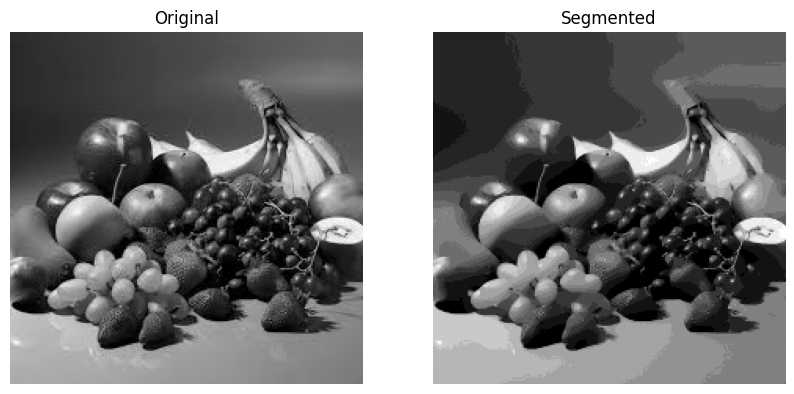

PSNR: 28.15, SSIM: 0.8969


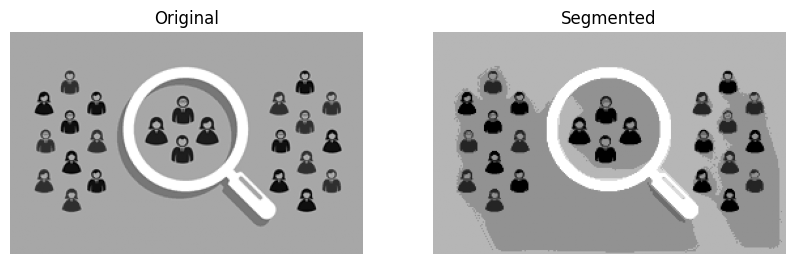

PSNR: 29.70, SSIM: 0.7932


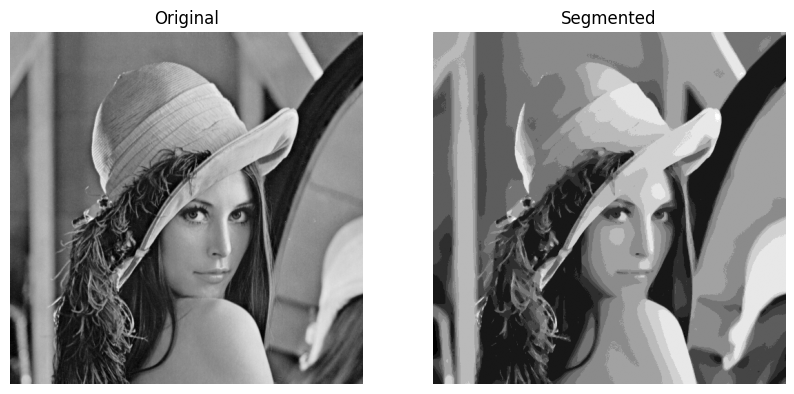

PSNR: 13.75, SSIM: 0.7720


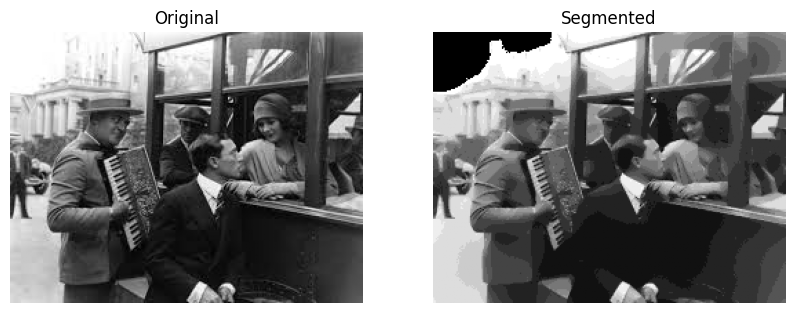

In [8]:
# Run segmentation on all images
result = run_ca(img_folder, iter1=8, iter2=8, multiple=16, debug=True)

## 🔬 Single Image Test and Metrics

PSNR: 28.57, SSIM: 0.8623


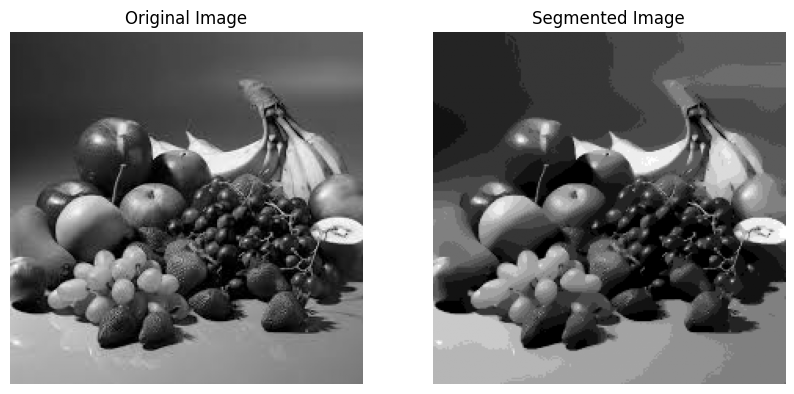

In [7]:
# Load a single grayscale image

image_paths = list_images_in_folder(img_folder)
img_path = image_paths[0]
original = load_grayscale_image(img_path)

# Perform segmentation
segmented = ca_image_segmentation(original, iter1=8, iter2=8, multiple=16)

# Compute evaluation metrics
psnr_val, ssim_val = evaluate_segmentation(original, segmented)
print(f"PSNR: {psnr_val:.2f}, SSIM: {ssim_val:.4f}")

# Display side-by-side comparison
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(original, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')
plt.show()

## 📦 Optional: Run on BSDS300 Dataset

You can use the Kaggle BSDS300 dataset for benchmarking. The package uses `kagglehub` to simplify downloading.

PSNR: 17.77, SSIM: 0.7227


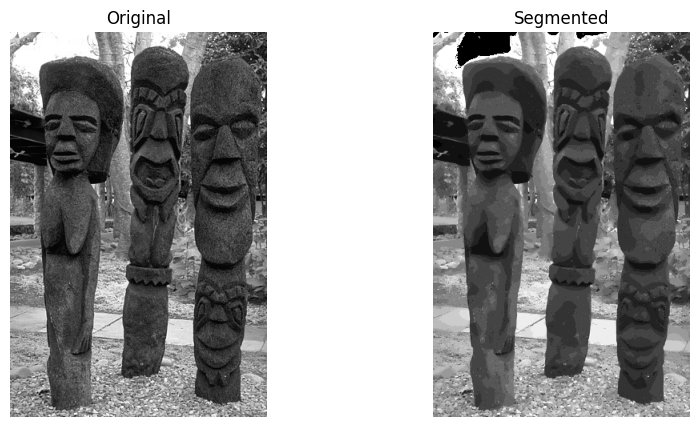

PSNR: 6.61, SSIM: 0.5621


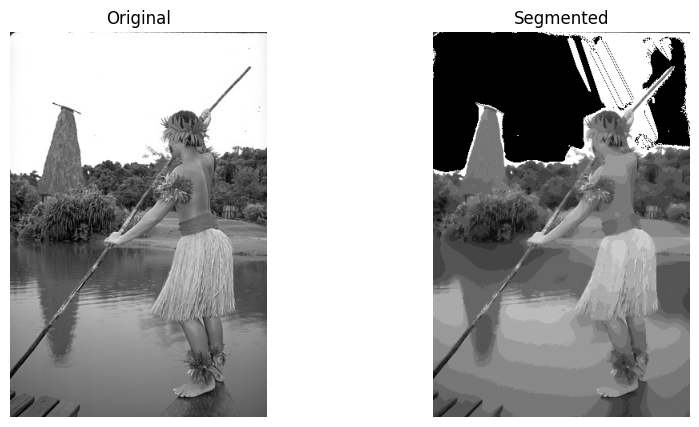

PSNR: 29.02, SSIM: 0.7888


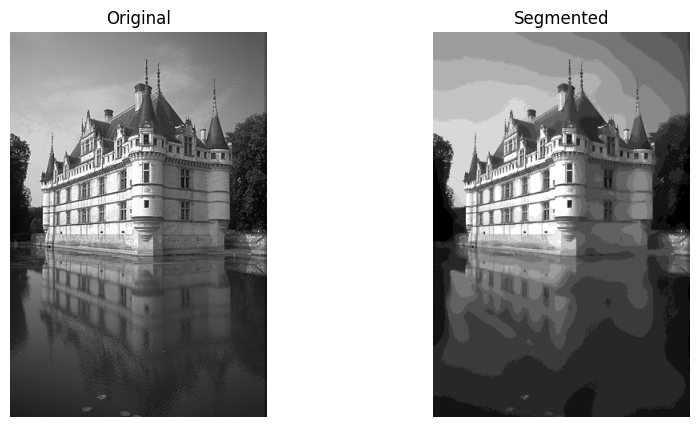

In [4]:
import os
import kagglehub

# Download dataset
dataset_path = kagglehub.dataset_download("adheshgarg/bsds300")
test_folder = os.path.join(dataset_path, "BSDS300", "images", "test")

# Run CA segmentation
result = run_ca(test_folder, iter1=8, iter2=8, multiple=16, limit=3, debug=True)

## ✅ Summary
- Implemented Cellular Automata segmentation in 3 phases.
- Computed **PSNR** and **SSIM** for quality assessment.
- Supports both local testing and public datasets.

This notebook can be extended to test new CA rules, different radii, or adaptive quantization schemes.